<a href="https://colab.research.google.com/github/meghaarajeev/EmoSense-EmotionAnalysis-Machine-Learning/blob/main/Copy_of_IIIT_EmotionIdentification_ResearchTeaser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/CheyneyComputerScience/CREMA-D.git

Cloning into 'CREMA-D'...
remote: Enumerating objects: 22501, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 22501 (delta 22), reused 57 (delta 13), pack-reused 22428
Receiving objects: 100% (22501/22501), 14.82 MiB | 14.48 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Updating files: 100% (22342/22342), done.
Filtering content: 100% (22326/22326), 3.42 GiB | 9.42 MiB/s, done.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd

In [ ]:
CREMA = '/content/CREMA-D/AudioWAV/'

In [ ]:
dir_list = os.listdir(CREMA)
dir_list.sort()
dir_list[:5]

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav']

In [ ]:
emotionG = []
gender = []
emotionO = []
path = []
female_ids = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,
              1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,
              1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,
              1082,1084,1089,1091]

temp_dict = {"SAD":"sad", "ANG": "angry", "DIS":"disgust", "FEA":"fear",
             "HAP":"happy", "NEU":"neutral"}


def get_emotion_crema(filename, ids=female_ids, dc=temp_dict):
  filename = filename.split("_")
  emotionG1 = dc[filename[2]]
  if int(filename[0]) in ids:
    emotionG2 = "_female"
  else:
    emotionG2 = "_male"
  emotionG = emotionG1 + emotionG2
  return (emotionG, emotionG1, emotionG2[1:])

for i in dir_list:
  emotionG.append(get_emotion_crema(i)[0])
  emotionO.append(get_emotion_crema(i)[1])
  gender.append(get_emotion_crema(i)[2])
  path.append(CREMA + i)

In [ ]:
CREMA_df = pd.DataFrame(emotionG, columns = ['emotionG_label'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(gender, columns = ['gender'])],axis=1)
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(emotionO, columns = ['emotion'])],axis=1)
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)

In [ ]:
CREMA_df.head()

,emotionG_label,source,gender,emotion,path
0,angry_male,CREMA,male,angry,/content/CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust_male,CREMA,male,disgust,/content/CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav
2,fear_male,CREMA,male,fear,/content/CREMA-D/AudioWAV/1001_DFA_FEA_XX.wav
3,happy_male,CREMA,male,happy,/content/CREMA-D/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral_male,CREMA,male,neutral,/content/CREMA-D/AudioWAV/1001_DFA_NEU_XX.wav


In [ ]:
CREMA_df.emotionG_label.value_counts()

angry_male        671
disgust_male      671
fear_male         671
happy_male        671
sad_male          671
angry_female      600
disgust_female    600
fear_female       600
happy_female      600
sad_female        600
neutral_male      575
neutral_female    512
Name: emotionG_label, dtype: int64

In [ ]:
CREMA_df_summary = CREMA_df.pivot_table(index='emotion', columns='gender', aggfunc=len, values = 'source')
CREMA_df_summary

gender,female,male
emotion,,
angry,600,671
disgust,600,671
fear,600,671
happy,600,671
neutral,512,575
sad,600,671


<Axes: ylabel='emotion'>

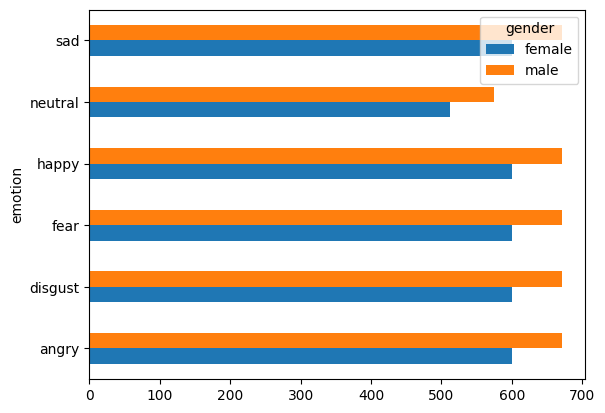

In [ ]:
CREMA_df_summary.plot(kind='barh')

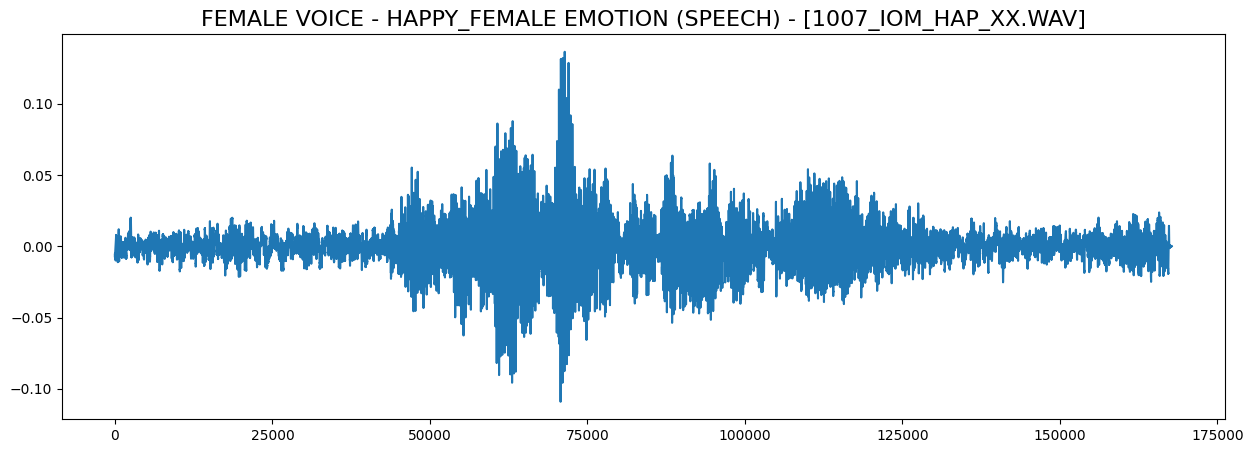

In [ ]:
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

# Assuming `CREMA_df` contains the DataFrame with file paths
n_files = CREMA_df.shape[0]

# Choose a random number
rnd = np.random.randint(0, n_files)

# Use the Librosa library to load the random speech
fname = CREMA_df.path[rnd]
data, sampling_rate = librosa.load(fname, sr=44100)

# Plot the waveform
plt.figure(figsize=(15, 5))
info = CREMA_df.iloc[rnd].values
title_txt = f'{info[2]} voice - {info[0]} emotion (speech) - [{os.path.basename(fname)}]'
plt.title(title_txt.upper(), size=16)
plt.plot(data)

# Display the plot
plt.show()

# Play the audio
ipd.Audio(data, rate=sampling_rate)

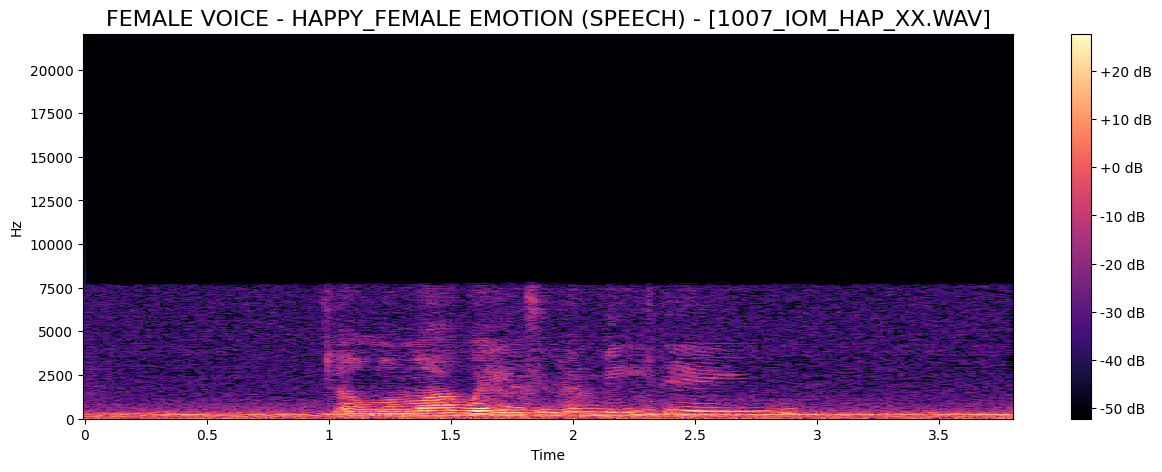

In [ ]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title(title_txt.upper(), size=16)
plt.show()

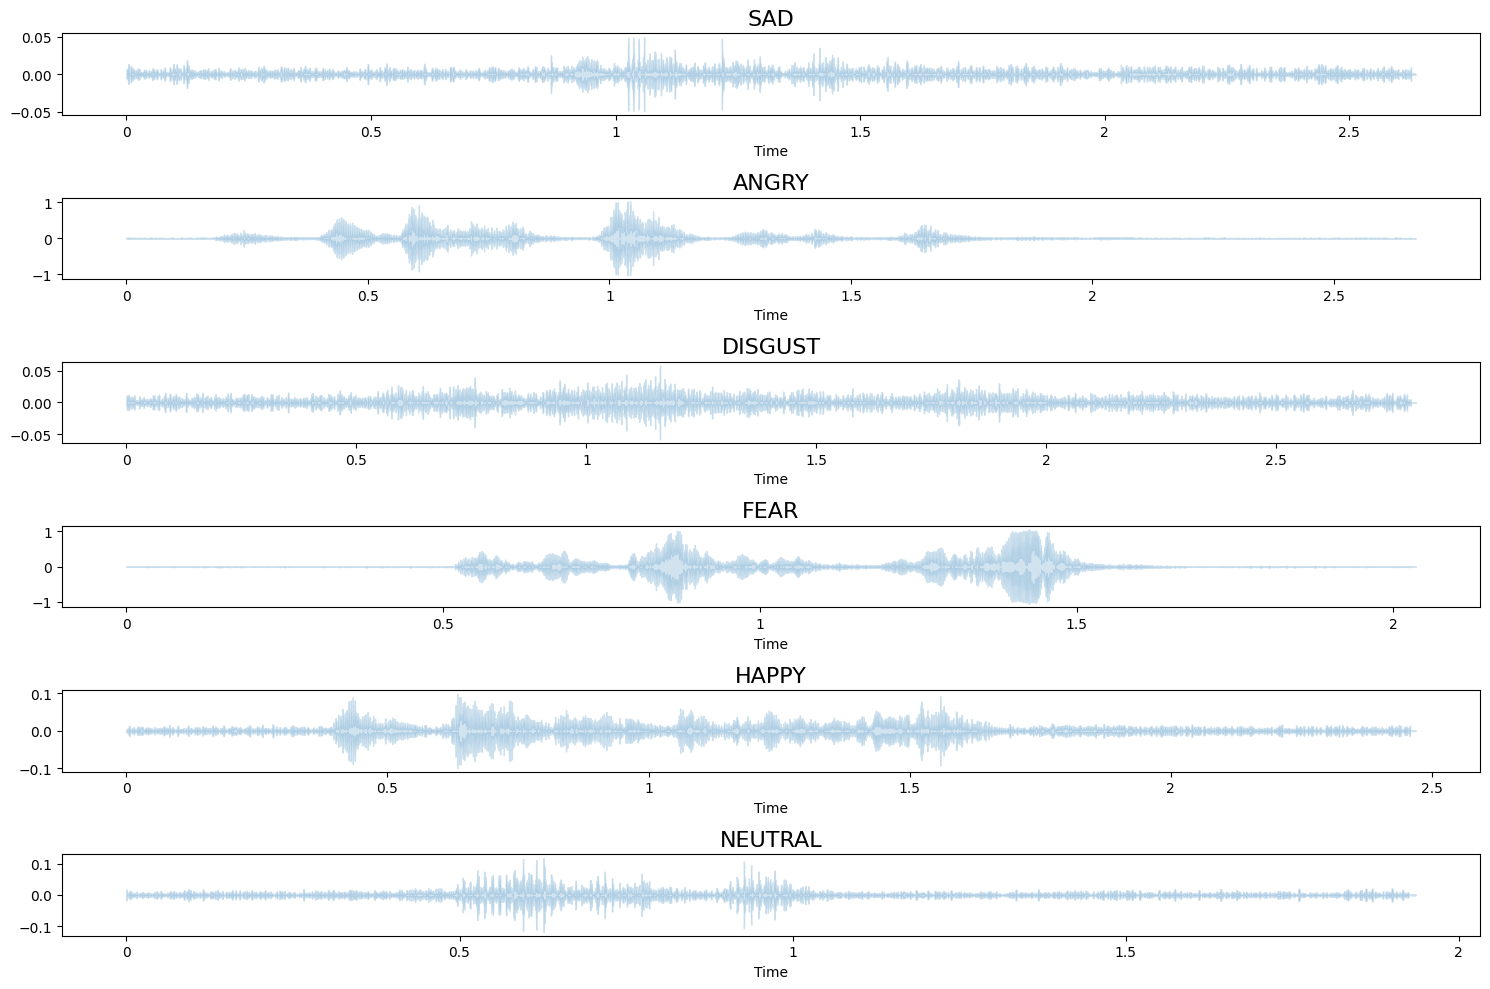

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

def plot_speech(fname, axis):
    data, sampling_rate = librosa.load(fname)
    librosa.display.waveshow(data, sr=sampling_rate, alpha=0.2, ax=axis)

emotions_list = list(temp_dict.values())
fig, ax = plt.subplots(len(emotions_list), 1, figsize=(15, 10))

for n, emotion_ in enumerate(emotions_list):
    pdata = CREMA_df.loc[CREMA_df.emotion == emotion_]
    rnd = np.random.randint(0, len(pdata))
    fname = pdata.iloc[rnd].path
    plot_speech(fname, ax[n])
    ax[n].set_title(emotion_.upper(), size=16)

plt.tight_layout()
plt.show()
plt.savefig('emotions.png')


In [ ]:
# Example code for feature extraction
def extract_features(file_path):
    data, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=data, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=data, sr=sr)
    return np.concatenate((mfccs.mean(axis=1), chroma.mean(axis=1), spectral_contrast.mean(axis=1)))

In [ ]:
# Create empty lists to store features and labels
X_features = []
y_labels = []


In [ ]:
for file_path, label in zip(CREMA_df['path'], CREMA_df['emotionG_label']):
    try:
        # Extract features from the audio file
        features = extract_features(file_path)
        # Check if features were successfully extracted and not empty
        if features is not None and len(features) > 0:
            # Append the features and label to the respective lists
            X_features.append(features)
            y_labels.append(label)
    except Exception as e:
        # Print error message if feature extraction fails for a file
        print(f"Error extracting features for file {file_path}: {e}")

In [ ]:
X = np.array(X_features)
y = np.array(y_labels)

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (14884, 32)
Shape of y: (14884,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.2717500839771582


In [ ]:
new_audio_file_path = '/content/CREMA-D/AudioWAV/1001_DFA_HAP_XX.wav'


In [ ]:

new_features = extract_features(new_audio_file_path)
new_features = new_features.reshape(1, -1)
predicted_emotion = svm_classifier.predict(new_features)
print("Predicted Emotion:", predicted_emotion[0])


Predicted Emotion: happy_female
